#DF02max Analysis

##Yükleme Fazı

In [ ]:
#Importing necessary tools
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
#Load text data as a numpy array
arr = np.loadtxt('/content/D02fmax.txt',delimiter='\t',dtype='float64')
arr[:15]

FileNotFoundError: /content/D02fmax.txt not found.

In [ ]:
#Converting array to dataframe
df = pd.DataFrame(arr,columns=['Sample 1','Sample 2'])
df.head()

,Sample 1,Sample 2
0,0.423242,0.070244
1,0.418359,0.075127
2,0.417748,0.070854
3,0.418359,0.069023
4,0.412255,0.065361


In [ ]:
#Summary for the data
df.describe()

,Sample 1,Sample 2
count,8719.000000,8719.000000
mean,0.222631,0.303572
std,0.260941,0.306955
min,-0.336646,-0.280098
25%,0.008203,0.029351
50%,0.229760,0.331475
75%,0.439721,0.545403
max,0.727197,0.861870


In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the first scatter plot
fig.add_trace(go.Scatter(x=df.index, y=df['Sample 1'],
                    mode='markers',
                    name='Sample 1',
                    marker=dict(size = 3, color='LightSeaGreen')))

# Add the second scatter plot
fig.add_trace(go.Scatter(x=df.index, y=df['Sample 2'],
                    mode='markers',
                    name='Sample 2',
                    marker=dict(size = 3, color='MediumPurple')))

# Update the layout
fig.update_layout(xaxis_title='Time (3 * 10 ** (-5) s)',
                  yaxis_title='Forces')

# Show the figure
fig.show()


##Kümeli Plotlama Fazı

In [ ]:
#Obtain all built-in colours of plotly to plot each period discretely

s ='''
                aqua, black,blueviolet,chartreuse,crimson, cyan, darkblue,deeppink,
                ivory, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                plum, powderblue, purple, red, rosybrown,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat, white, whitesmoke, yellow,
                yellowgreen'''

li = s.split(',')
li = [l.replace('\n','') for l in li]
li = [l.replace(' ','') for l in li]
li[:6]

['aqua', 'black', 'blueviolet', 'chartreuse', 'crimson', 'cyan']

In [ ]:
def plotting(fig,start,end,colourNum,indexList):
  # Add the first scatter plot
  fig.add_trace(go.Scatter(x = np.array(range(indexList[end]-indexList[start])), y=df['Sample 1'].iloc[indexList[start]:indexList[end]],
                      mode='markers',
                      marker=dict(size = 4, color = colourNum),
                      name = f'Sample 1 {indexList[end]}'))

  # Add the second scatter plot
  fig.add_trace(go.Scatter(x = np.array(range(indexList[end]-indexList[start])), y=df['Sample 2'].iloc[indexList[start]:indexList[end]],
                      mode='markers',
                      marker=dict(size = 4, color = colourNum),
                      name = f'Sample 2 {indexList[end]}'))

def beforeSame(df, ind):
  return (df['Sample 1'].iloc[ind - 1] < df['Sample 2'].iloc[ind - 1] and df['Sample 1'].iloc[ind] >= df['Sample 2'].iloc[ind]) or (df['Sample 1'].iloc[ind - 1] > df['Sample 2'].iloc[ind - 1] and df['Sample 1'].iloc[ind] <= df['Sample 2'].iloc[ind])

In [ ]:
#Main program
def mainProgram(df):
  ind = 1
  indexList = []
  while ind != df.count()[0]:
    if beforeSame(df, ind):

      indexList.append(ind)

    elif df['Sample 2'].iloc[ind] == df['Sample 1'].iloc[ind]:
      indexList.append(ind)


    ind += 1

  return indexList

#fig = go.Figure()
# Update the layout
#fig.update_layout(xaxis_title='Time (3 * 10 ** (-5) s)',
#                  yaxis_title='Forces')

# Show the figure
#fig.show()

In [ ]:
df['Sample 1'][20:30]

20    0.407372
21    0.410424
22    0.414086
23    0.414086
24    0.414086
25    0.417138
26    0.417748
27    0.419579
28    0.421411
29    0.418359
Name: Sample 1, dtype: float64

In [ ]:
fig = go.Figure()

for interval in range((len(indexList) // 4) -1):
  plotting(fig, 4 * interval, 4 * interval + 4, li[interval], indexList)


# Update the layout
fig.update_layout(xaxis_title='Time (3 * 10 ** (-5) s)',
                  yaxis_title='Forces')

# Show the figure
fig.show()

##Analysis Phase

###HeatMap

In [ ]:
indexRow = pd.DataFrame(np.arange(801),columns = ['endeks']) #Form an index array for the longest data

for interval in range((len(indexList) // 4) -1):
  indexRow = pd.concat([indexRow, df['Sample 1'].iloc[indexList[4 * interval]: indexList[4 * interval + 4]].reset_index(drop = True),df['Sample 2'].iloc[indexList[4 * interval]: indexList[4 * interval + 4]].reset_index(drop = True)], ignore_index = True, axis = 1)

indexRow.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,801.000000,798.000000,798.000000,784.000000,784.000000,798.000000,798.000000,792.000000,792.000000,794.000000,...,785.000000,785.000000,790.000000,790.000000,796.000000,796.000000,787.000000,787.000000,801.000000,801.000000
mean,400.000000,0.214688,0.287766,0.217013,0.283088,0.208958,0.289423,0.211692,0.294935,0.239081,...,0.226518,0.309891,0.220922,0.306787,0.242564,0.317480,0.239934,0.335671,0.199547,0.322678
std,231.373075,0.251515,0.295946,0.249125,0.296799,0.247466,0.292866,0.248767,0.295565,0.261289,...,0.277189,0.319746,0.258286,0.312416,0.267810,0.317615,0.279674,0.327426,0.275101,0.308248
min,0.000000,-0.288428,-0.216011,-0.202979,-0.226387,-0.280494,-0.223335,-0.254859,-0.195869,-0.288428,...,-0.253028,-0.237373,-0.246314,-0.231270,-0.307960,-0.255073,-0.310401,-0.280098,-0.336646,-0.245308
25%,200.000000,0.013848,0.018669,-0.001105,0.031639,0.024987,0.009514,-0.004005,0.042626,0.010949,...,-0.018653,0.029351,0.030023,-0.001320,0.024682,0.033776,0.000573,0.054985,-0.007056,0.040337
50%,400.000000,0.214196,0.317131,0.216027,0.306755,0.211755,0.296990,0.238000,0.307366,0.237695,...,0.219995,0.346733,0.219995,0.335137,0.250207,0.371758,0.276147,0.398003,0.212670,0.352227
75%,600.000000,0.401879,0.508477,0.414086,0.509087,0.409966,0.521294,0.422173,0.523125,0.465814,...,0.461083,0.555474,0.429345,0.568291,0.463830,0.559441,0.466577,0.603081,0.433007,0.582939
max,800.000000,0.692407,0.800835,0.649682,0.809990,0.631982,0.794121,0.659448,0.809380,0.713769,...,0.702172,0.861870,0.687524,0.821587,0.704614,0.851494,0.727197,0.861870,0.672265,0.830132


In [ ]:
colName = ['index']
for period in range(len(indexRow.columns)//2):
  colName.append(f'Sample 1 Period {period+1}')
  colName.append(f'Sample 2 Period {period+1}')

indexRow.columns = colName

In [ ]:
indexRow.drop('index', axis = 1, inplace = True)
indexRow.describe()

,Sample 1 Period 1,Sample 2 Period 1,Sample 1 Period 2,Sample 2 Period 2,Sample 1 Period 3,Sample 2 Period 3,Sample 1 Period 4,Sample 2 Period 4,Sample 1 Period 5,Sample 2 Period 5,Sample 1 Period 6,Sample 2 Period 6,Sample 1 Period 7,Sample 2 Period 7,Sample 1 Period 8,Sample 2 Period 8,Sample 1 Period 9,Sample 2 Period 9,Sample 1 Period 10,Sample 2 Period 10
count,798.000000,798.000000,784.000000,784.000000,798.000000,798.000000,792.000000,792.000000,794.000000,794.000000,785.000000,785.000000,790.000000,790.000000,796.000000,796.000000,787.000000,787.000000,801.000000,801.000000
mean,0.214688,0.287766,0.217013,0.283088,0.208958,0.289423,0.211692,0.294935,0.239081,0.305229,0.226518,0.309891,0.220922,0.306787,0.242564,0.317480,0.239934,0.335671,0.199547,0.322678
std,0.251515,0.295946,0.249125,0.296799,0.247466,0.292866,0.248767,0.295565,0.261289,0.305168,0.277189,0.319746,0.258286,0.312416,0.267810,0.317615,0.279674,0.327426,0.275101,0.308248
min,-0.288428,-0.216011,-0.202979,-0.226387,-0.280494,-0.223335,-0.254859,-0.195869,-0.288428,-0.242866,-0.253028,-0.237373,-0.246314,-0.231270,-0.307960,-0.255073,-0.310401,-0.280098,-0.336646,-0.245308
25%,0.013848,0.018669,-0.001105,0.031639,0.024987,0.009514,-0.004005,0.042626,0.010949,0.020653,-0.018653,0.029351,0.030023,-0.001320,0.024682,0.033776,0.000573,0.054985,-0.007056,0.040337
50%,0.214196,0.317131,0.216027,0.306755,0.211755,0.296990,0.238000,0.307366,0.237695,0.338188,0.219995,0.346733,0.219995,0.335137,0.250207,0.371758,0.276147,0.398003,0.212670,0.352227
75%,0.401879,0.508477,0.414086,0.509087,0.409966,0.521294,0.422173,0.523125,0.465814,0.534569,0.461083,0.555474,0.429345,0.568291,0.463830,0.559441,0.466577,0.603081,0.433007,0.582939
max,0.692407,0.800835,0.649682,0.809990,0.631982,0.794121,0.659448,0.809380,0.713769,0.814873,0.702172,0.861870,0.687524,0.821587,0.704614,0.851494,0.727197,0.861870,0.672265,0.830132


In [ ]:
lis = []
for interval in range((len(indexList) // 4) -1):
  lis.append(indexList[4 * interval] - indexList[4 * interval + 4])

print(lis)

[-798, -784, -798, -792, -794, -785, -790, -796, -787, -801]


In [ ]:
indexRow.corr()

,Sample 1 Period 1,Sample 2 Period 1,Sample 1 Period 2,Sample 2 Period 2,Sample 1 Period 3,Sample 2 Period 3,Sample 1 Period 4,Sample 2 Period 4,Sample 1 Period 5,Sample 2 Period 5,Sample 1 Period 6,Sample 2 Period 6,Sample 1 Period 7,Sample 2 Period 7,Sample 1 Period 8,Sample 2 Period 8,Sample 1 Period 9,Sample 2 Period 9,Sample 1 Period 10,Sample 2 Period 10
Sample 1 Period 1,1.000000,-0.412328,0.969509,-0.283783,0.981197,-0.366943,0.973348,-0.335985,0.978384,-0.377106,0.955020,-0.315093,0.975086,-0.400650,0.980188,-0.456147,0.964904,-0.387906,0.973284,-0.439404
Sample 2 Period 1,-0.412328,1.000000,-0.477144,0.981323,-0.363549,0.994802,-0.414297,0.991432,-0.446711,0.994571,-0.486438,0.986601,-0.401839,0.994559,-0.380750,0.994560,-0.435590,0.993019,-0.295225,0.993234
Sample 1 Period 2,0.969509,-0.477144,1.000000,-0.346804,0.963082,-0.429412,0.961843,-0.399231,0.960536,-0.442842,0.978231,-0.378721,0.973295,-0.459039,0.960467,-0.518823,0.968563,-0.456242,0.947414,-0.504073
Sample 2 Period 2,-0.283783,0.981323,-0.346804,1.000000,-0.230553,0.984238,-0.292479,0.990238,-0.324691,0.985478,-0.366702,0.992640,-0.272304,0.981985,-0.254992,0.971878,-0.310966,0.983717,-0.162851,0.970748
Sample 1 Period 3,0.981197,-0.363549,0.963082,-0.230553,1.000000,-0.319243,0.979462,-0.284603,0.970526,-0.329016,0.958966,-0.263463,0.978119,-0.349482,0.986182,-0.408954,0.957710,-0.335482,0.981250,-0.388643
Sample 2 Period 3,-0.366943,0.994802,-0.429412,0.984238,-0.319243,1.000000,-0.368309,0.992634,-0.401792,0.994065,-0.440110,0.989297,-0.356443,0.993484,-0.335754,0.988704,-0.388798,0.989194,-0.247616,0.989236
Sample 1 Period 4,0.973348,-0.414297,0.961843,-0.292479,0.979462,-0.368309,1.000000,-0.342082,0.989800,-0.384726,0.978553,-0.323045,0.978002,-0.407612,0.979056,-0.462802,0.976200,-0.393081,0.953257,-0.440014
Sample 2 Period 4,-0.335985,0.991432,-0.399231,0.990238,-0.284603,0.992634,-0.342082,1.000000,-0.377554,0.994595,-0.416960,0.994403,-0.327421,0.990944,-0.304670,0.985756,-0.366965,0.989966,-0.213812,0.982428
Sample 1 Period 5,0.978384,-0.446711,0.960536,-0.324691,0.970526,-0.401792,0.989800,-0.377554,1.000000,-0.415664,0.978363,-0.357506,0.974034,-0.440327,0.975971,-0.492869,0.978979,-0.424510,0.944205,-0.473367
Sample 2 Period 5,-0.377106,0.994571,-0.442842,0.985478,-0.329016,0.994065,-0.384726,0.994595,-0.415664,1.000000,-0.457364,0.992466,-0.368538,0.994967,-0.347723,0.993243,-0.409611,0.993997,-0.259035,0.986259


<function matplotlib.pyplot.show(close=None, block=None)>

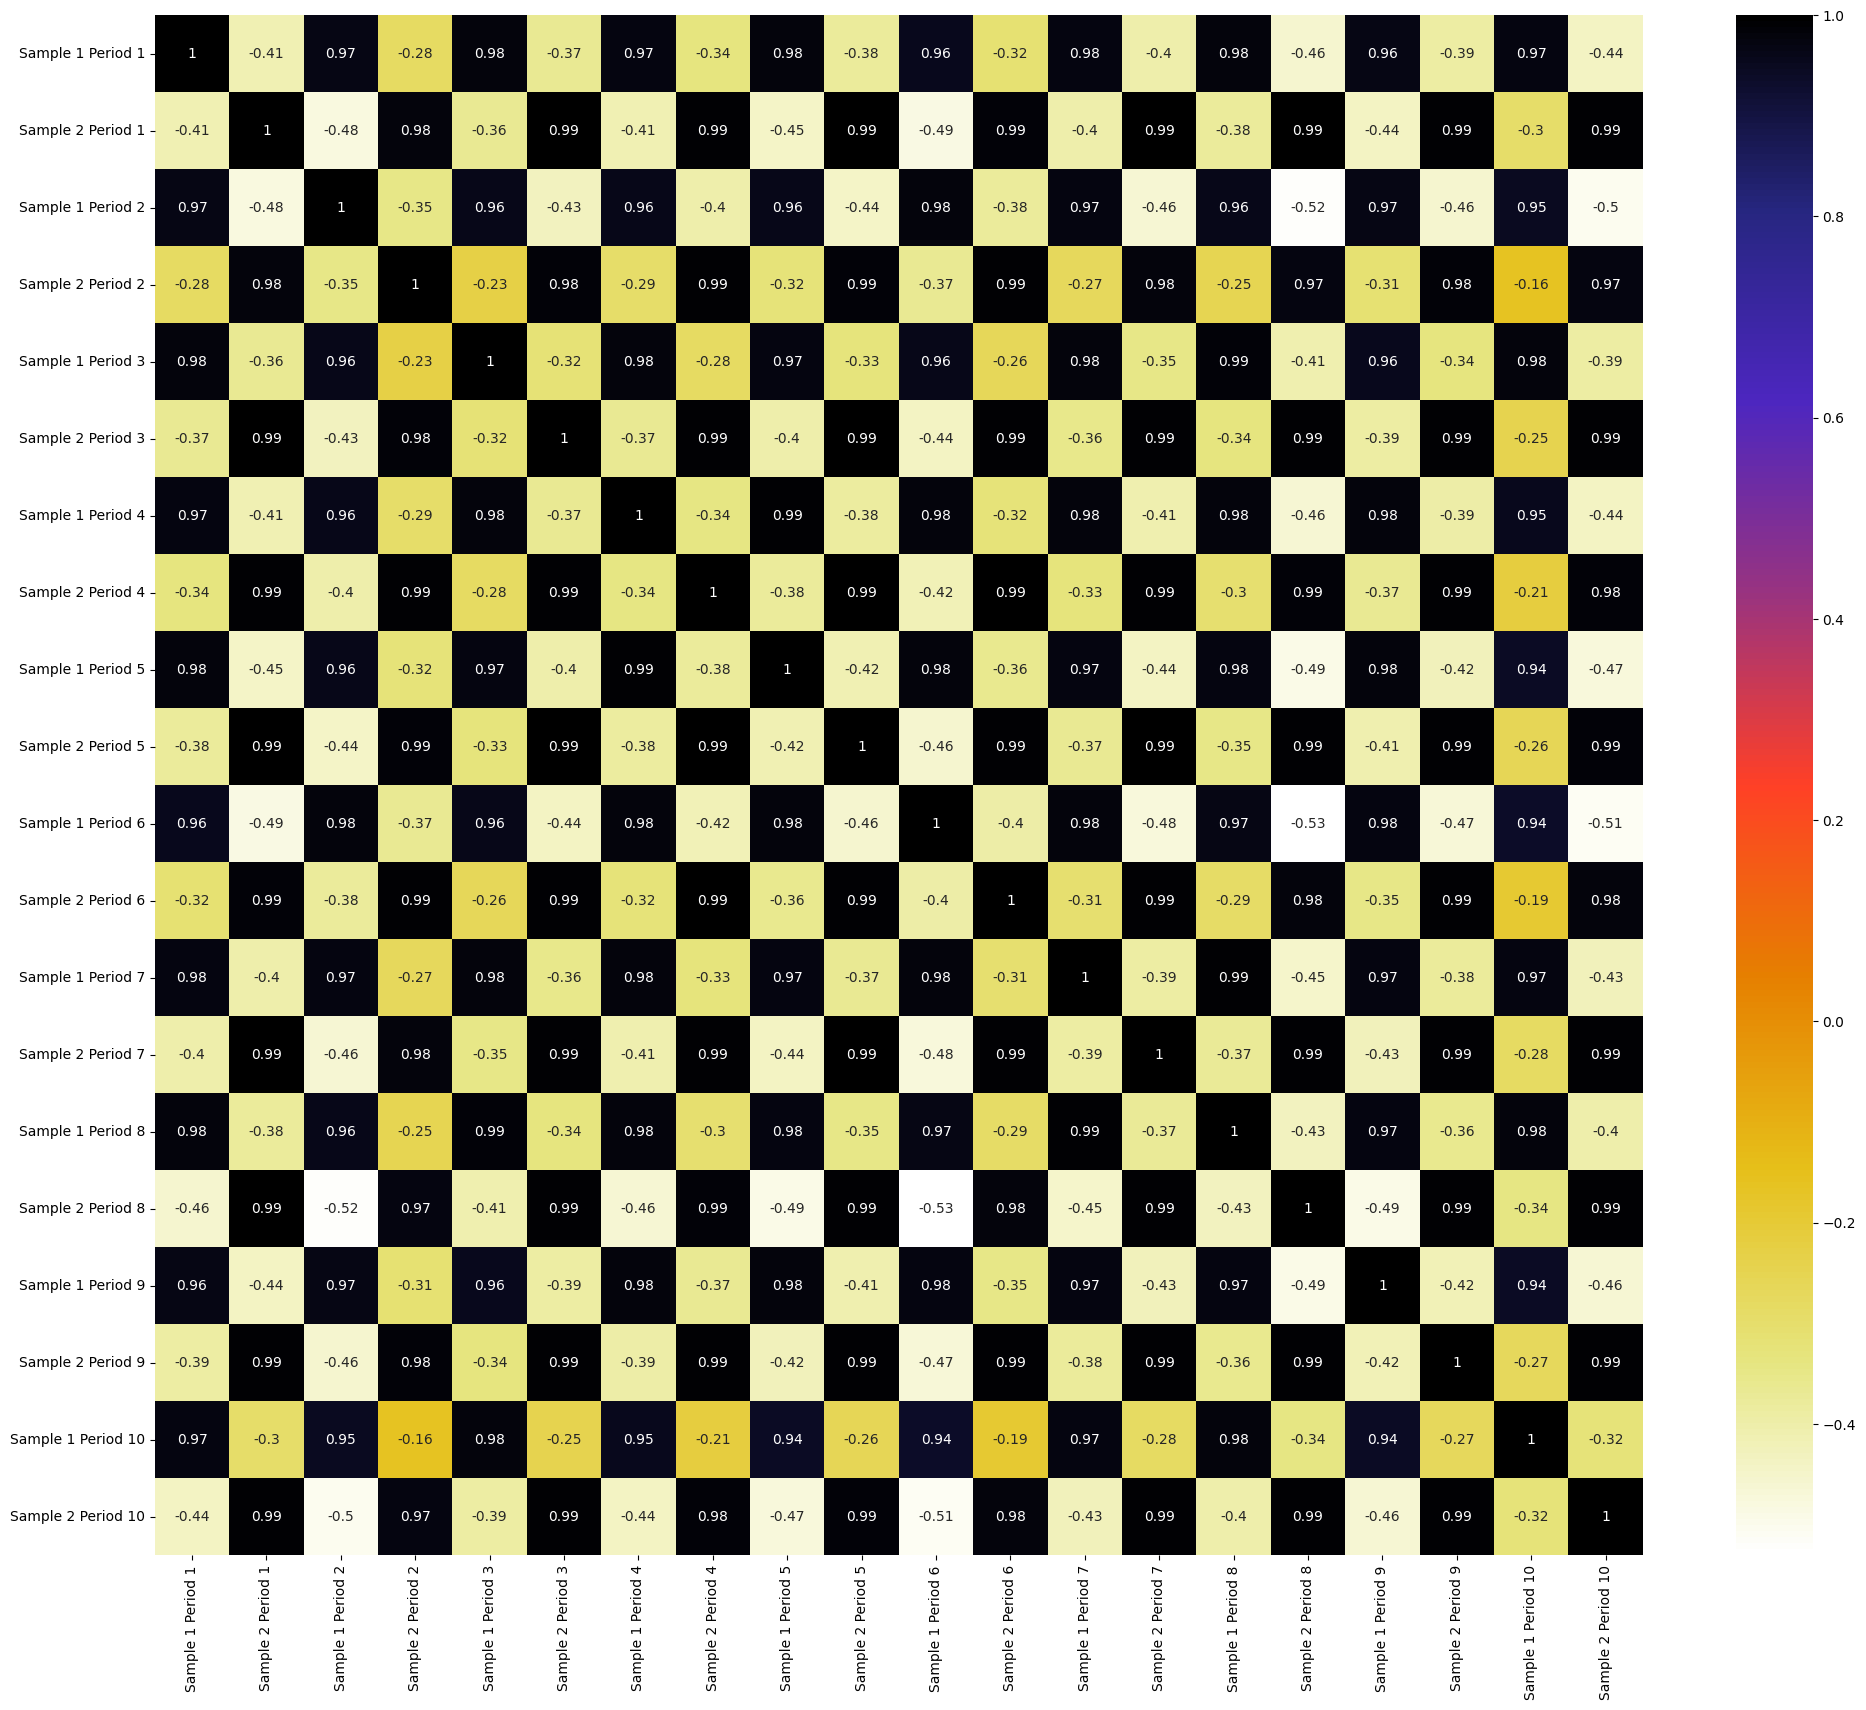

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (24,20))
cor = indexRow.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.savefig("output.png")
plt.show()

###Average behaviour of Curves

In [ ]:
x = np.arange(784)
meanValues_1 = []
meanValues_2 = []
for step in range(784):
  sum_1 = 0
  sum_2 = 0
  for period in range(10):
    sum_1 += df['Sample 1'].iloc[indexList[4 * period] + step]
    sum_2 += df['Sample 2'].iloc[indexList[4 * period] + step]
  mean_1 = sum_1 / 10
  mean_2 = sum_2 / 10
  meanValues_1.append(mean_1)
  meanValues_2.append(mean_2)

meanValues_1[5:10]

[0.28310485839843796,
 0.27657409667968796,
 0.27193542480468796,
 0.26894470214843796,
 0.26540466308593796]

In [ ]:
meanValues_2[5:10]

[0.35784179687499995,
 0.36626464843749995,
 0.37352783203124995,
 0.38231689453124995,
 0.39104492187499995]

In [ ]:
fig.add_trace(go.Scatter(x = np.array(range(784)), y = meanValues_1,
                      mode='markers',
                      name= 'Average Sample 1',
                      marker=dict(size = 6, color = 'red' )))

  # Add the second scatter plot
fig.add_trace(go.Scatter(x = np.array(range(784)), y= meanValues_2,
                      mode='markers',
                      name= 'Average Sample 2',
                      marker=dict(size = 6, color = 'red')))

fig.update_layout(title = 'Graph with Average Behaviour of Periods')

fig.show()

###Uncertainity (Mean of RV Values -standard derrivative / mean-)

In [ ]:
import statistics as stat
x = np.arange(784)
stdValues_1 = []
stdValues_2 = []
rv_1 = []
rv_2 = []
for step in range(784):
  values_1 = []
  values_2 = []
  for period in range(10):
    values_1.append(df['Sample 1'].iloc[indexList[4 * period] + step])
    values_2.append(df['Sample 2'].iloc[indexList[4 * period] + step])
  stdValues_1.append(stat.stdev(values_1))
  stdValues_2.append(stat.stdev(values_2))
  rv_1.append(stat.stdev(values_1) / meanValues_1[step])
  rv_2.append(stat.stdev(values_1) / meanValues_2[step])

stdValues_1 = np.array(stdValues_1)
stdValues_2 = np.array(stdValues_2)
rv_1 = np.array(rv_1)
rv_2 = np.array(rv_2)

print('Mean Standart Derivative of Sample 1:',stdValues_1.mean(),'\nMean Standart Derivative of Sample 2:', stdValues_2.mean())
print('Mean RV value of Sample 1',rv_1.mean(),'\nMean RV value of Sample 2:',rv_2.mean())

Mean Standart Derivative of Sample 1: 0.044377203399706244 
Mean Standart Derivative of Sample 2: 0.03606631429064318
Mean RV value of Sample 1 0.07243037545087512 
Mean RV value of Sample 2: 0.1458015223536785


#DF02min Analysis

##Loading and Stack Plotting Phase

In [ ]:
#Load text data as a numpy array
arr = np.loadtxt('/content/D02fmin.txt',delimiter='\t',dtype='float64')
#Convert into DataFrame
df = pd.DataFrame(arr,columns=['Sample 1','Sample 2'])

df.head()

,Sample 1,Sample 2
0,0.320256,0.067614
1,0.320866,0.074328
2,0.322087,0.074938
3,0.325749,0.072497
4,0.330021,0.072497


In [ ]:
#Summary for the data
df.describe()

,Sample 1,Sample 2
count,4754.000000,4754.000000
mean,0.185121,0.199756
std,0.177013,0.249148
min,-0.186946,-0.262586
25%,0.054295,-0.033094
50%,0.191472,0.229968
75%,0.303166,0.377673
max,0.535710,0.642565


In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the first scatter plot
fig.add_trace(go.Scatter(x=df.index, y=df['Sample 1'],
                    mode='markers',
                    name='Sample 1',
                    marker=dict(size = 3, color='lightblue')))

# Add the second scatter plot
fig.add_trace(go.Scatter(x=df.index, y=df['Sample 2'],
                    mode='markers',
                    name='Sample 2',
                    marker=dict(size = 3, color='orange')))

# Update the layout
fig.update_layout(xaxis_title='Time (3 * 10 ** (-5) s)',
                  yaxis_title='Forces')

# Show the figure
fig.show()


In [ ]:
s ='''blueviolet,chartreuse,crimson, cyan,ivory, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                plum, powderblue, purple, red, rosybrown,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat,'''

li = s.split(',')
li = [l.replace('\n','') for l in li]
li = [l.replace(' ','') for l in li]
li[:6]

['blueviolet', 'chartreuse', 'crimson', 'cyan', 'ivory', 'khaki']

In [ ]:
indexList = mainProgram(df)
indexList

[61,
 231,
 427,
 663,
 830,
 1019,
 1215,
 1455,
 1624,
 1813,
 2012,
 2247,
 2413,
 2605,
 2798,
 3036,
 3203,
 3224,
 3231,
 3394,
 3588,
 3828,
 3997,
 4187,
 4386,
 4618]

In [ ]:
import plotly.io as pio
pio.templates.default = "plotly_dark"
fig = go.Figure()

for interval in range((len(indexList) // 4) -1):
  plotting(fig, 4 * interval, 4 * interval + 4, li[interval], indexList)


# Update the layout
fig.update_layout(xaxis_title='Time (3 * 10 ** (-5) s)',
                  yaxis_title='Forces')

# Show the figure
fig.show()

In [ ]:
indexRow = pd.DataFrame(np.arange(794),columns = ['endeks']) #Form an index array for the longest data

for interval in range((len(indexList) // 4) -1):
  indexRow = pd.concat([indexRow, df['Sample 1'].iloc[indexList[4 * interval]: indexList[4 * interval + 4]].reset_index(drop = True),df['Sample 2'].iloc[indexList[4 * interval]: indexList[4 * interval + 4]].reset_index(drop = True)], ignore_index = True, axis = 1)

indexRow.describe()

colName = ['index']
for period in range(len(indexRow.columns)//2):
  colName.append(f'Sample 1 Period {period+1}')
  colName.append(f'Sample 2 Period {period+1}')

indexRow.columns = colName

In [ ]:
indexRow.set_index('index', inplace = True)
indexRow

,Sample 1 Period 1,Sample 2 Period 1,Sample 1 Period 2,Sample 2 Period 2,Sample 1 Period 3,Sample 2 Period 3,Sample 1 Period 4,Sample 2 Period 4,Sample 1 Period 5,Sample 2 Period 5
index,,,,,,,,,,
0,0.279973,0.284289,0.214665,0.220202,0.232365,0.236682,0.228703,0.231188,0.221379,0.222033
1,0.279973,0.285510,0.211003,0.226306,0.227482,0.244616,0.226872,0.236682,0.217106,0.228747
2,0.277531,0.291613,0.207951,0.226306,0.226872,0.248889,0.230534,0.245226,0.218327,0.235461
3,0.275700,0.289172,0.211613,0.229968,0.226872,0.255602,0.227482,0.251940,0.214665,0.237902
4,0.276921,0.294055,0.205510,0.223254,0.223210,0.255602,0.227482,0.255602,0.214055,0.240344
...,...,...,...,...,...,...,...,...,...,...
789,NaN,NaN,0.245793,0.207995,NaN,NaN,0.223210,0.208605,NaN,NaN
790,NaN,NaN,0.245793,0.215930,NaN,NaN,NaN,NaN,NaN,NaN
791,NaN,NaN,0.243351,0.226306,NaN,NaN,NaN,NaN,NaN,NaN


##Analysis Phase

###Heat Map

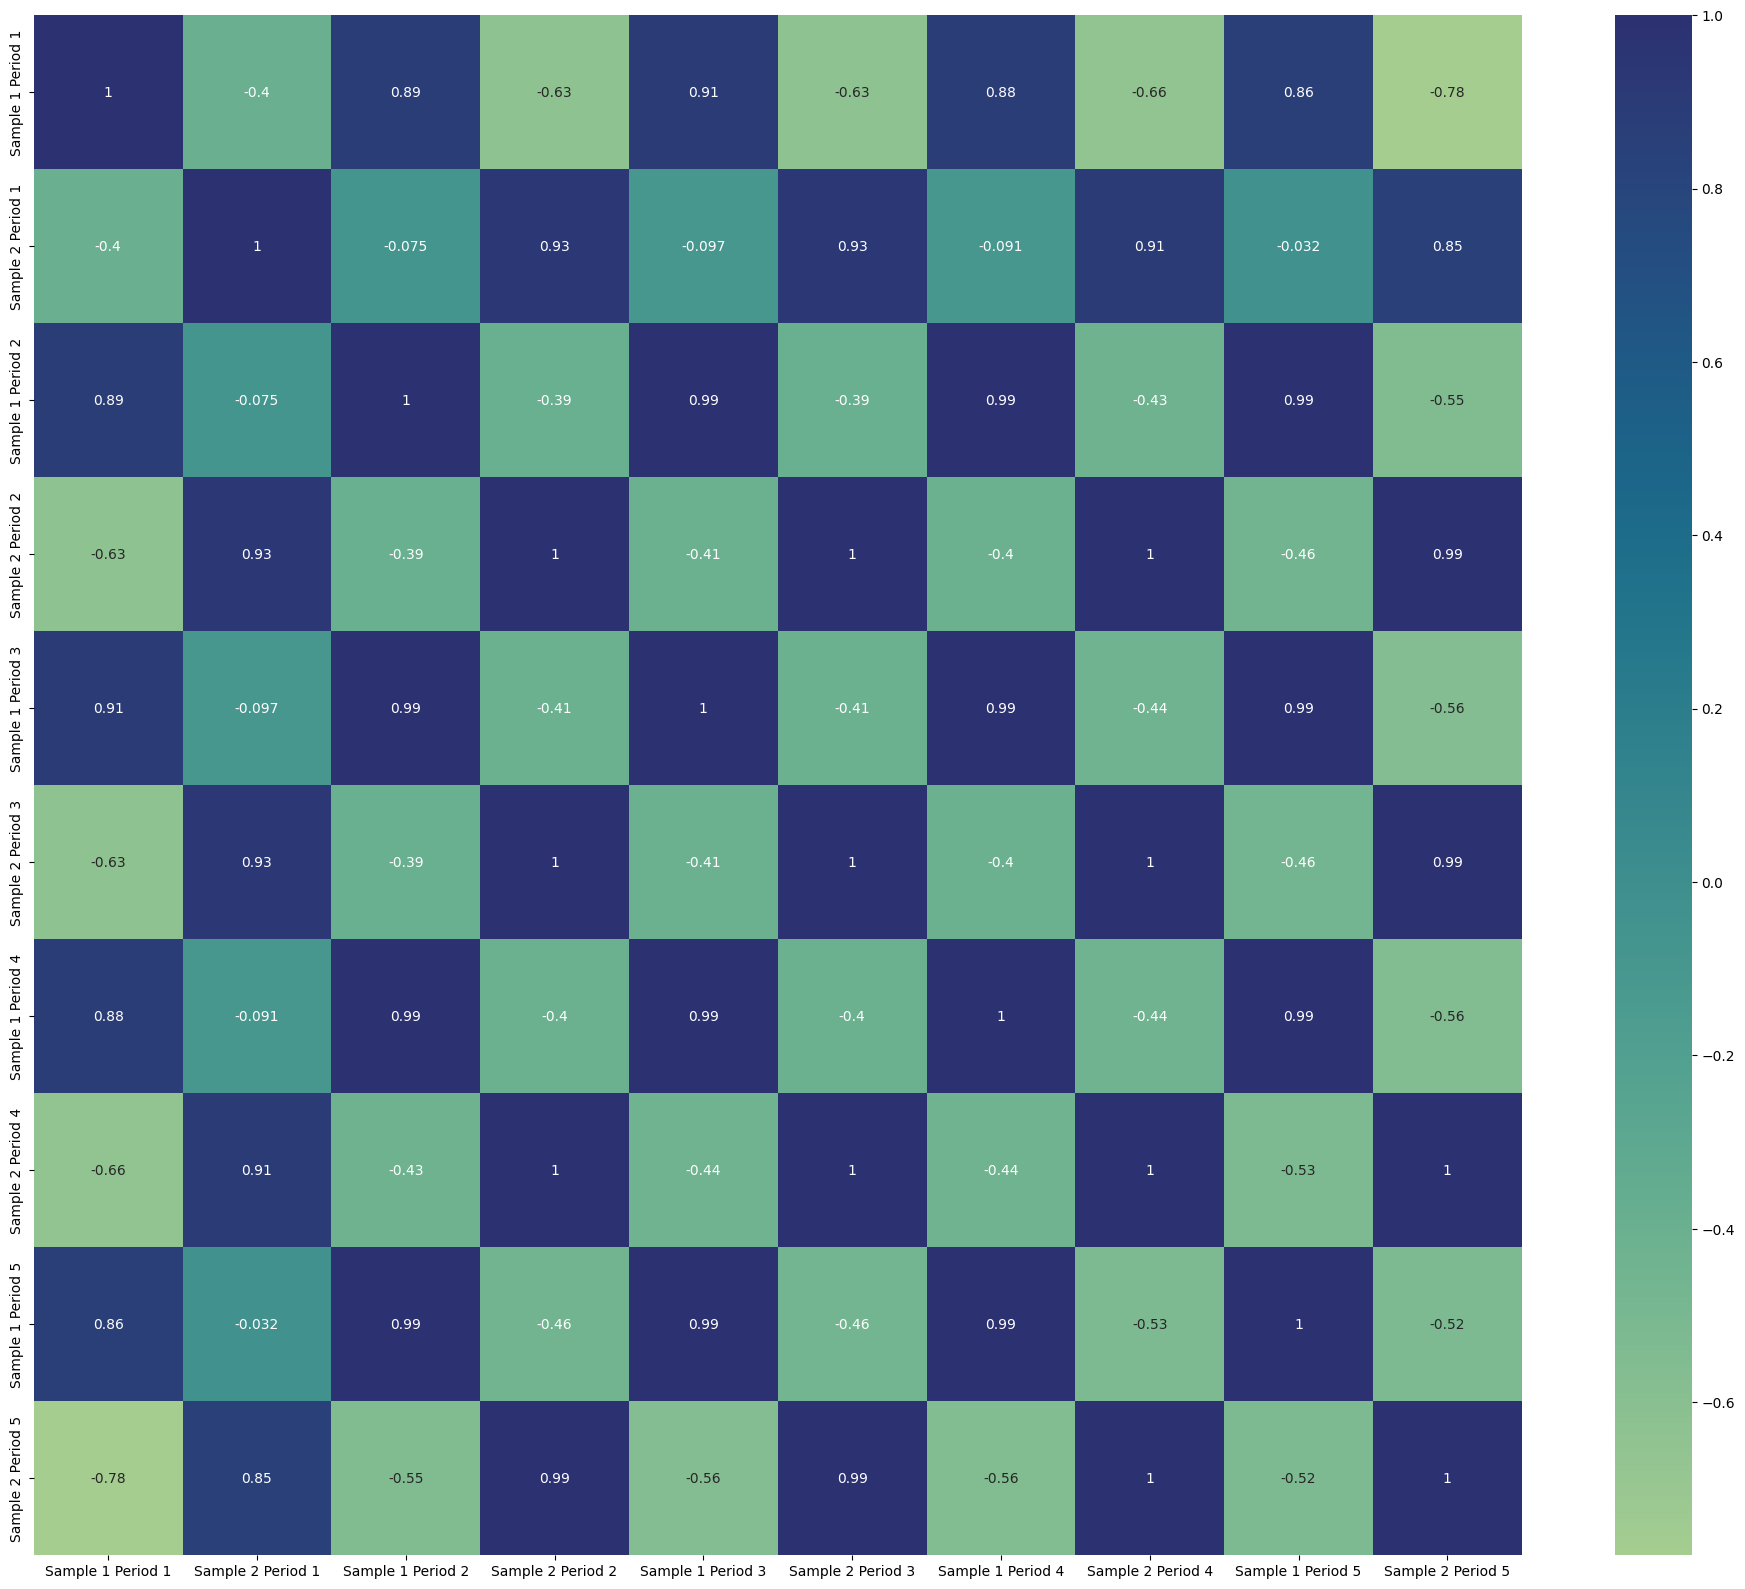

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = indexRow.corr()
plt.figure(figsize = (24,20))
sns.heatmap(cor, annot = True, cmap = 'crest')
plt.savefig("output_D02min.png")
plt.show()

###Graph with Average Line

In [ ]:
x = np.arange(768)
meanValues_1 = []
meanValues_2 = []
for step in x:
  sum_1 = 0
  sum_2 = 0
  for period in range(5):
    sum_1 += df['Sample 1'].iloc[indexList[4 * period] + step]
    sum_2 += df['Sample 2'].iloc[indexList[4 * period] + step]
    mean_1 = sum_1 / 5
    mean_2 = sum_2 / 5
  meanValues_1.append(mean_1)
  meanValues_2.append(mean_2)

meanValues_1[5:10]

[0.2280926513671878,
 0.2279705810546878,
 0.2260174560546878,
 0.2279705810546878,
 0.227116088867188]

In [ ]:
fig.add_trace(go.Scatter(x = np.array(range(793)), y = meanValues_1,
                      mode='markers',
                      name= 'Average Sample 1',
                      marker=dict(size = 6, color = 'red' )))

  # Add the second scatter plot
fig.add_trace(go.Scatter(x = np.array(range(793)), y= meanValues_2,
                      mode='markers',
                      name= 'Average Sample 2',
                      marker=dict(size = 6, color = 'red')))

fig.update_layout(title = 'Graph with Average Behaviour of Periods')

fig.show()

###Uncertainity (Mean of RV Values -standard derrivative / mean-)

In [ ]:
import statistics as stat
x = np.arange(768)
stdValues_1 = []
stdValues_2 = []
rv_1 = []
rv_2 = []
for step in x:
  values_1 = []
  values_2 = []
  for period in range(5):
    values_1.append(df['Sample 1'].iloc[indexList[4 * period] + step])
    values_2.append(df['Sample 2'].iloc[indexList[4 * period] + step])
  stdValues_1.append(stat.stdev(values_1))
  stdValues_2.append(stat.stdev(values_2))
  rv_1.append(stat.stdev(values_1) / meanValues_1[step])
  rv_2.append(stat.stdev(values_1) / meanValues_2[step])

stdValues_1 = np.array(stdValues_1)
stdValues_2 = np.array(stdValues_2)
rv_1 = np.array(rv_1)
rv_2 = np.array(rv_2)

print('Mean Standart Derivative of Sample 1:',stdValues_1.mean(),'\nMean Standart Derivative of Sample 2:', stdValues_2.mean())
print('Mean RV value of Sample 1',rv_1.mean(),'\nMean RV value of Sample 2:',rv_2.mean())

Mean Standart Derivative of Sample 1: 0.03415528783930085 
Mean Standart Derivative of Sample 2: 0.042666805216597076
Mean RV value of Sample 1 0.5427010192224019 
Mean RV value of Sample 2: -0.04159441488176182


#RNN Application

In [ ]:
def create_dataset(dataset, look_back=300):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back)]
    dataX.append(a)
    dataY.append(dataset[i + look_back])
  return np.array(dataX), np.array(dataY)

In [ ]:
#Scaling the whole dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

nScaler = MinMaxScaler()
array = arr[::,1].copy()
array = array.reshape(-1,1)
data = nScaler.fit_transform(array)

X, y = create_dataset(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)



In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3562, 300, 1) (891, 300, 1) (3562, 1) (891, 1)


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers

# Define the model
model = tf.keras.Sequential([
    layers.Dense(200, activation='relu', input_shape=(300,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/10
112/112 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 2.8074e-04
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 8.5541e-04 - accuracy: 2.8074e-04
Epoch 3/10
112/112 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 2.8074e-04
Epoch 4/10
112/112 [==============================] - 0s 4ms/step - loss: 5.7915e-04 - accuracy: 2.8074e-04
Epoch 5/10
112/112 [==============================] - 0s 4ms/step - loss: 6.2581e-04 - accuracy: 2.8074e-04
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 6.3508e-04 - accuracy: 2.8074e-04
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 4.9754e-04 - accuracy: 2.8074e-04
Epoch 8/10
112/112 [==============================] - 0s 3ms/step - loss: 6.5581e-04 - accuracy: 2.8074e-04
Epoch 9/10
112/112 [==============================] - 0s 3ms/step - loss: 5.5589e-04 - accuracy: 2.8074e-04
Epoch 10/10
28/28 [=================

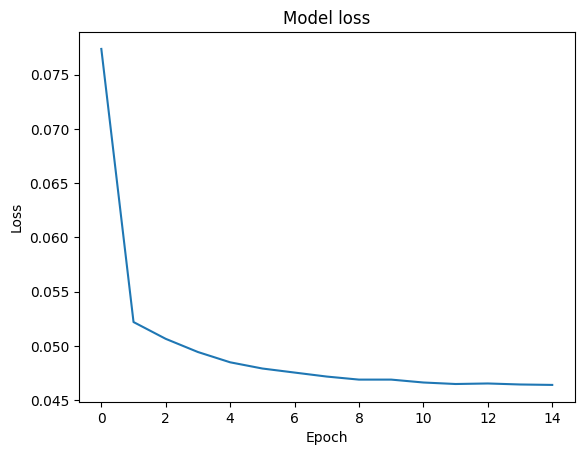

In [ ]:
# prompt: Sketch the loss graph of model
import matplotlib.pyplot as plt
# Plot the loss graph
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
predictions_1 = model.predict(X_test)
print('Score:',score)

28/28 [==============================] - 0s 2ms/step
Score: [0.0003472395765129477, 0.0011223345063626766]


In [ ]:
predictions_1.shape

(891, 1)

In [ ]:
correlation_df = pd.concat([pd.DataFrame(predictions), pd.DataFrame(y_test)], axis = 1)
correlation_df.columns = ['Predictions','Expected']
correlation_df.corr()

,Predictions,Expected
Predictions,1.00000,0.99833
Expected,0.99833,1.00000


In [ ]:
correlation_df.sort_values(by = 'Expected', inplace = True)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = np.array(range(931)), y = correlation_df['Predictions'],
                      mode='markers',
                      name= 'Predictions',
                      marker=dict(size = 6, color = 'red' )))

  # Add the second scatter plot
fig.add_trace(go.Scatter(x = np.array(range(931)), y= correlation_df['Expected'],
                      mode='markers',
                      name= 'Expected',
                      marker=dict(size = 6, color = 'blue')))

fig.update_layout(title = 'Expectation vs Prediction on X_test')

fig.show()

In [ ]:
data = np.copy(X[-1])
data.resize(1,300,1)
pred_array = []
for step in range(800):
  prediction = model.predict(data)
  pred_array.append(prediction)
  prediction = np.resize(prediction, (1,1,1))
  data = data[:,1:,:]
  data = np.concatenate([data, prediction], axis = 1)

In [ ]:
pred_array = np.array(pred_array)
pred_array = pred_array.reshape(1,800)

In [ ]:
pred_array.resize(1,800)
pred_array = nScaler.inverse_transform(pred_array)
pred_array.resize(800)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = np.arange(len(pred_array)), y = pred_array, mode='markers', name='pred'))
fig.update_layout(title='ANN Predictions', xaxis_title='Time', yaxis_title='Force')

fig.show()

In [ ]:
import plotly.graph_objects as go


# Create the figure
fig1 = go.Figure()

# Add the first scatter plot
fig1.add_trace(go.Scatter(x=df.index, y=df['Sample 1'],
                    mode='markers',
                    name='Sample 1',
                    marker=dict(size = 3, color='lightblue')))

# Add the second scatter plot
fig1.add_trace(go.Scatter(x=df.index, y=df['Sample 2'],
                    mode='markers',
                    name='Sample 2',
                    marker=dict(size = 3, color='orange')))
fig1.add_trace(go.Scatter(x = np.arange(start = df.shape[0], stop = df.shape[0] + 800), y = pred_array,
                          mode='markers',
                          name='Prediction',
                          marker=dict(size = 3, color='green')))
# Update the layout
fig1.update_layout(xaxis_title='Time (3 * 10 ** (-5) s)',
                  yaxis_title='Forces',
                   title = 'Original Data with Prediction Added',
                   template = 'plotly_dark')

# Show the figure
fig1.show()
